In [1]:
    import matplotlib.pyplot as plt 
    import numpy as np 
    import os 
    import cv2
    import PIL 
    import pathlib 
    import tensorflow as tf 
    import matplotlib.pyplot as plt 
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.python.keras.layers import Dense, Flatten
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.optimizers import Adam
    from sklearn.metrics import confusion_matrix , classification_report
    img_width, img_height=368, 497

In [2]:
data = tf.keras.utils.image_dataset_from_directory(directory="D:\\Lane_FYP\\Data_V1", image_size=(img_height, img_width))

Found 2867 files belonging to 2 classes.


In [3]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [4]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
resnet_model = Sequential() 
pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(497,368,3), pooling='avg',classes=2, weights='imagenet') 
for layer in pretrained_model.layers: 
    layer.trainable=False 

resnet_model.add(pretrained_model) 
resnet_model.add(Flatten()) 
resnet_model.add(Dense(512, activation='relu')) 
resnet_model.add(Dense(1, activation='sigmoid'))

In [7]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
hist = resnet_model.fit(train, epochs=10, validation_data=val)

Epoch 1/10



62/62 [==============================] - 2564s 42s/step - loss: 0.1069 - accuracy: 0.9632 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/10
62/62 [==============================] - 514s 8s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/10
62/62 [==============================] - 500s 8s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.5257e-04 - val_accuracy: 1.0000
Epoch 4/10
62/62 [==============================] - 477s 8s/step - loss: 8.0169e-04 - accuracy: 1.0000 - val_loss: 4.3669e-04 - val_accuracy: 1.0000
Epoch 5/10
62/62 [==============================] - 451s 7s/step - loss: 4.8065e-04 - accuracy: 1.0000 - val_loss: 3.3957e-04 - val_accuracy: 1.0000
Epoch 6/10
62/62 [==============================] - 443s 7s/step - loss: 3.5169e-04 - accuracy: 1.0000 - val_loss: 2.4554e-04 - val_accuracy: 1.0000
Epoch 7/10
62/62 [==============================] - 450s 7s/step - loss: 2.6588e-04 - accuracy: 1.0000 - val_loss: 1.7831e-04 - val_acc

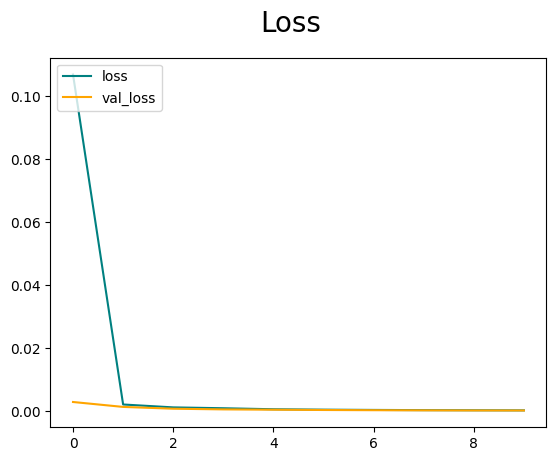

In [9]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

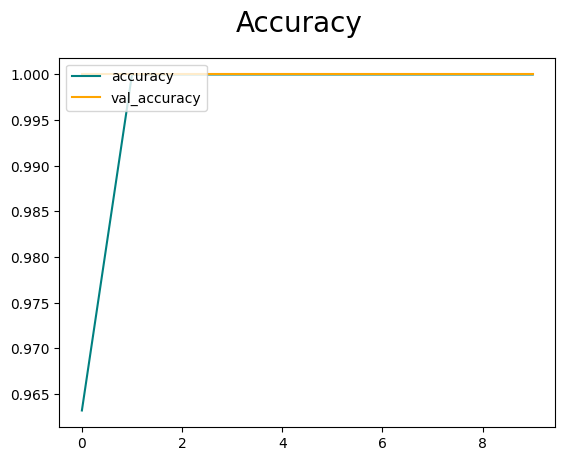

In [10]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [11]:
model_evaluation= resnet_model.evaluate(val, batch_size = 32)

 2/19 [==>...........................] - ETA: 1:36 - loss: 9.6790e-05 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
evaluation= resnet_model.evaluate(val, batch_size = 32)

In [2]:
resnet_model = keras.models.load_model("resnet_model_v1")

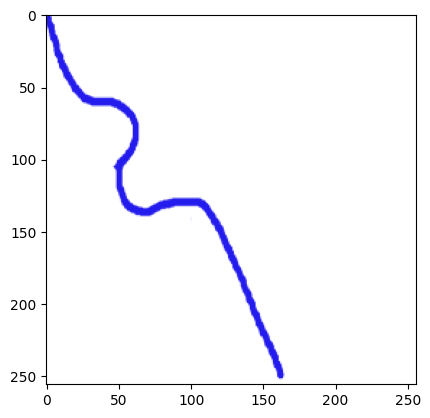

1/1 [==============================] - 2s 2s/step
[[1.]]
Reckless Driving


In [3]:
img2 = cv2.imread("D:\\Lane_FYP\\Data_V1\\reckless_driving33.png")
plt.imshow(tf.image.resize(img2, (256,256)).numpy().astype(int))
plt.show()
resize2 = cv2.resize(img2, (img_width, img_height))
image2 = np.expand_dims(resize2,axis=0)
pred2=resnet_model.predict(image2)
print(pred2)
print("Safe Driving" if int(pred2) < 0.5 else "Reckless Driving")

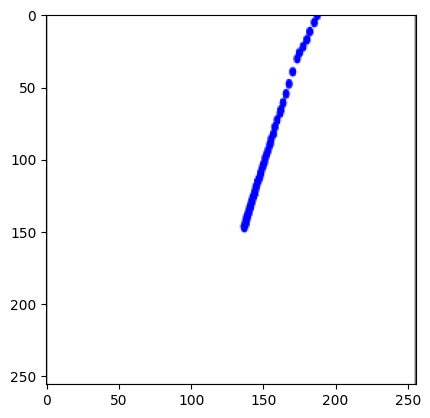

1/1 [==============================] - 0s 280ms/step
[[2.9254136e-07]]
Safe Driving


In [4]:
img = cv2.imread("D:\\Lane_FYP\\Data_V1\\safe_driving\image-44.png")
plt.imshow(tf.image.resize(img, (256,256)).numpy().astype(int))
plt.show()
resize = cv2.resize(img, (img_width, img_height))
image = np.expand_dims(resize,axis=0)
pred=resnet_model.predict(image)
print(pred)
print("Safe Driving" if int(pred) < 0.5 else "Reckless Driving")

In [ ]:
print(resnet_model.summary())